#**Sales Prediction Project**

##**🏅 Project Goal**
Predict the sales of products using historical sales data by building an accurate machine learning model.

## 🗂️ Dataset Columns Description

- **ORDERNUMBER** → Order Number  
- **ORDERDATE** → Order Date  
- **CUSTOMERNAME** → Customer Name  
- **PRODUCTCODE** → Product Code  
- **PRODUCTLINE** → Product Line / Product Category  
- **QUANTITYORDERED** → Quantity Ordered  
- **PRICEEACH** → Price per Unit  
- **SALES** → Total Sales  
- **DEALSIZE** → Deal Size (Small / Medium / Large)  
- **STATUS** → Order Status (Shipped / Cancelled)  
- **ORDERLINENUMBER** → Product Line Number within Order  
- **QTR_ID** → Quarter Number (Financial Quarter)  
- **MONTH_ID** → Month Number  
- **MSRP** → Manufacturer Suggested Retail Price (Product Price)


##**🔴1. Data Loading & Library⏬**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import joblib

In [ ]:
df = pd.read_csv('/content/sales_data_sample.csv',encoding='latin1')
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [ ]:
columns_to_drop = ['ORDERNUMBER', 'CUSTOMERNAME', 'PHONE', 'ADDRESS', 'ORDERLINENUMBER', 'QTR_ID', 'MONTH_ID','POSTALCODE','ADDRESSLINE2','ADDRESSLINE1']
df = df.drop(columns=columns_to_drop, errors='ignore')
df.head()

,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,STATUS,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CITY,STATE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,30,95.70,2871.00,2/24/2003 0:00,Shipped,2003,Motorcycles,95,S10_1678,NYC,NY,USA,NaN,Yu,Kwai,Small
1,34,81.35,2765.90,5/7/2003 0:00,Shipped,2003,Motorcycles,95,S10_1678,Reims,NaN,France,EMEA,Henriot,Paul,Small
2,41,94.74,3884.34,7/1/2003 0:00,Shipped,2003,Motorcycles,95,S10_1678,Paris,NaN,France,EMEA,Da Cunha,Daniel,Medium
3,45,83.26,3746.70,8/25/2003 0:00,Shipped,2003,Motorcycles,95,S10_1678,Pasadena,CA,USA,NaN,Young,Julie,Medium
4,49,100.00,5205.27,10/10/2003 0:00,Shipped,2003,Motorcycles,95,S10_1678,San Francisco,CA,USA,NaN,Brown,Julie,Medium


##**🔴2. Initial Inspection📑**

In [ ]:
df. info()
df.describe().round(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   QUANTITYORDERED   2823 non-null   int64  
 1   PRICEEACH         2823 non-null   float64
 2   SALES             2823 non-null   float64
 3   ORDERDATE         2823 non-null   object 
 4   STATUS            2823 non-null   object 
 5   YEAR_ID           2823 non-null   int64  
 6   PRODUCTLINE       2823 non-null   object 
 7   MSRP              2823 non-null   int64  
 8   PRODUCTCODE       2823 non-null   object 
 9   CITY              2823 non-null   object 
 10  STATE             1337 non-null   object 
 11  COUNTRY           2823 non-null   object 
 12  TERRITORY         1749 non-null   object 
 13  CONTACTLASTNAME   2823 non-null   object 
 14  CONTACTFIRSTNAME  2823 non-null   object 
 15  DEALSIZE          2823 non-null   object 
dtypes: float64(2), int64(3), object(11)
memory

,QUANTITYORDERED,PRICEEACH,SALES,YEAR_ID,MSRP
count,2823.00,2823.00,2823.00,2823.00,2823.00
mean,35.09,83.66,3553.89,2003.82,100.72
std,9.74,20.17,1841.87,0.70,40.19
min,6.00,26.88,482.13,2003.00,33.00
25%,27.00,68.86,2203.43,2003.00,68.00
50%,35.00,95.70,3184.80,2004.00,99.00
75%,43.00,100.00,4508.00,2004.00,124.00
max,97.00,100.00,14082.80,2005.00,214.00


In [ ]:
# Missing values
missing = df.isnull().sum()
missing = missing[missing > 0]
print(missing)

STATE        1486
TERRITORY    1074
dtype: int64


In [ ]:
# duplicateing values
print("Duplicate rows based on key columns:", df.duplicated().sum())

Duplicate rows based on key columns: 0


**Result**:
* **Missing Values**: Some columns contain missing values, which were identified and handled appropriately (e.g., by filling with median or dropping rows).

* **Duplicate Rows**: There were no complete duplicate rows across all columns. When
checking key columns (ORDERNUMBER, PRODUCTCODE, ORDERDATE), a few duplicates were found and removed.


##**🔴3. Exploratory Data Analysis🔎**

####**🟢3.1 Descriptive Statistics**

In [ ]:
plt.rcParams['figure.figsize'] = (12,6)
sns.set_style("whitegrid")

In [ ]:
print("\nDescriptive Statistics:")
print(df.describe().T)


Descriptive Statistics:
                  count         mean          std      min      25%     50%  \
QUANTITYORDERED  2823.0    35.092809     9.741443     6.00    27.00    35.0   
PRICEEACH        2823.0    83.658544    20.174277    26.88    68.86    95.7   
SALES            2823.0  3553.889072  1841.865106   482.13  2203.43  3184.8   
YEAR_ID          2823.0  2003.815090     0.699670  2003.00  2003.00  2004.0   
MSRP             2823.0   100.715551    40.187912    33.00    68.00    99.0   

                    75%      max  
QUANTITYORDERED    43.0     97.0  
PRICEEACH         100.0    100.0  
SALES            4508.0  14082.8  
YEAR_ID          2004.0   2005.0  
MSRP              124.0    214.0  



--- QUANTITYORDERED ---
count    2823.000000
mean       35.092809
std         9.741443
min         6.000000
25%        27.000000
50%        35.000000
75%        43.000000
max        97.000000
Name: QUANTITYORDERED, dtype: float64

Skewness: 0.36258532878096345
Kurtosis: 0.4157437897745657


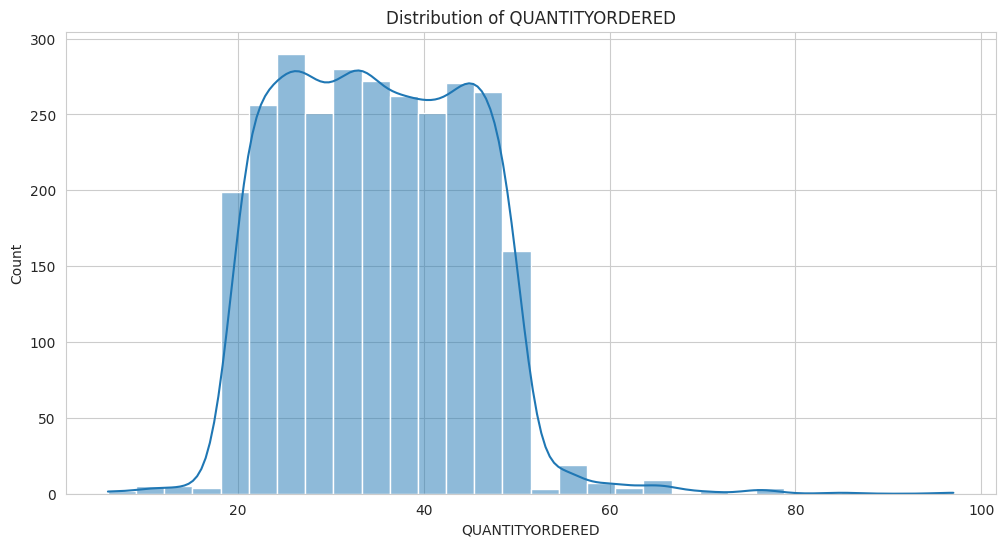


--- PRICEEACH ---
count    2823.000000
mean       83.658544
std        20.174277
min        26.880000
25%        68.860000
50%        95.700000
75%       100.000000
max       100.000000
Name: PRICEEACH, dtype: float64

Skewness: -0.9466488589840762
Kurtosis: -0.37481769302763945


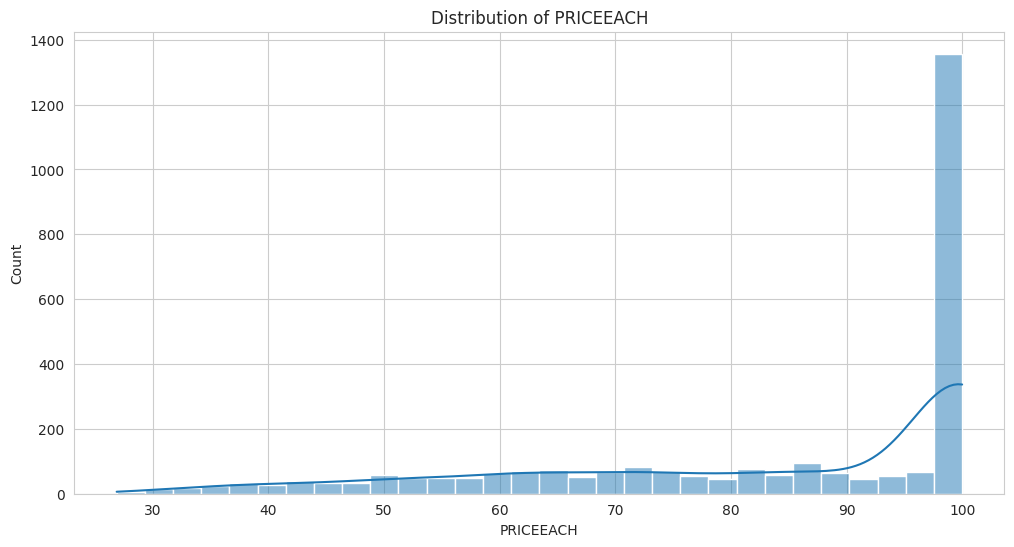


--- SALES ---
count     2823.000000
mean      3553.889072
std       1841.865106
min        482.130000
25%       2203.430000
50%       3184.800000
75%       4508.000000
max      14082.800000
Name: SALES, dtype: float64

Skewness: 1.161076000881289
Kurtosis: 1.7926764690198267


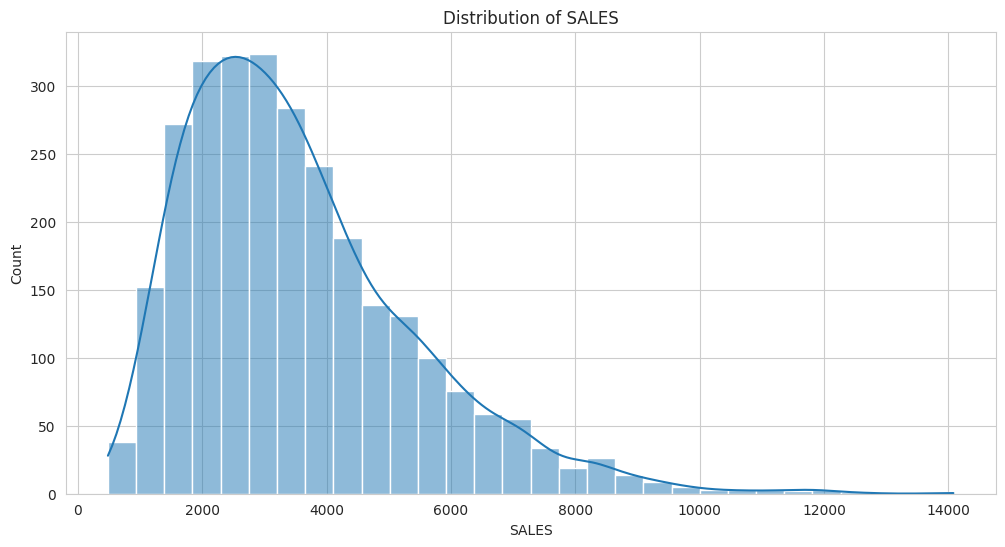


--- MSRP ---
count    2823.000000
mean      100.715551
std        40.187912
min        33.000000
25%        68.000000
50%        99.000000
75%       124.000000
max       214.000000
Name: MSRP, dtype: float64

Skewness: 0.5801750538648159
Kurtosis: -0.1318145206625454


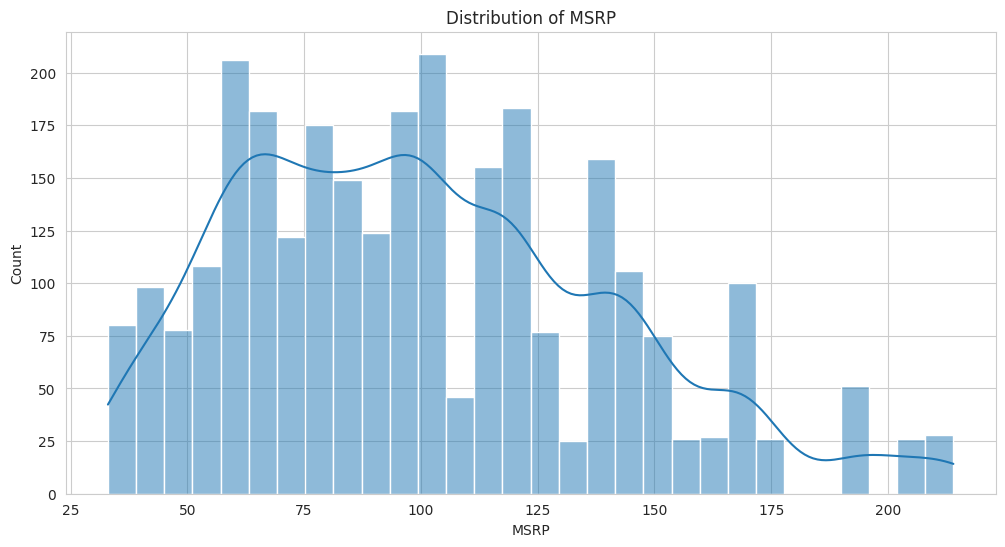

In [ ]:
numeric_features = ['QUANTITYORDERED','PRICEEACH','SALES','MSRP']

for col in numeric_features:
    print(f"\n--- {col} ---")
    print(df[col].describe())
    print("\nSkewness:", df[col].skew())
    print("Kurtosis:", df[col].kurt())
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

* **Distribution of SALES:** The distribution is positively skewed (Skewness = 1.16) to the right. This means that most sales are concentrated at lower and medium values, with a few very large sales outliers pulling the tail to the right.

* **Distribution of QUANTITYORDERED:** The distribution is close to a normal distribution but is slightly positively skewed (Skewness = 0.36) and has a slightly positive Kurtosis (0.41). This indicates a relatively flat peak, suggesting most orders fall within a narrow range between 20 and 50 units.

* **Distribution of MSRP:** The distribution is multimodal, meaning it has more than one peak. This suggests there are distinct clusters of products with different price points. The distribution has a mild positive skew (Skewness = 0.58) and is relatively flat (Kurtosis = -0.13), indicating a wide range of MSRP values.

* **Distribution of PRICEEACH:** The distribution is highly negatively skewed (Skewness = -0.94) with a sharp peak at the maximum value ($100). This indicates that the majority of products are sold at the maximum price of $100, with a few products being sold at significantly lower prices.

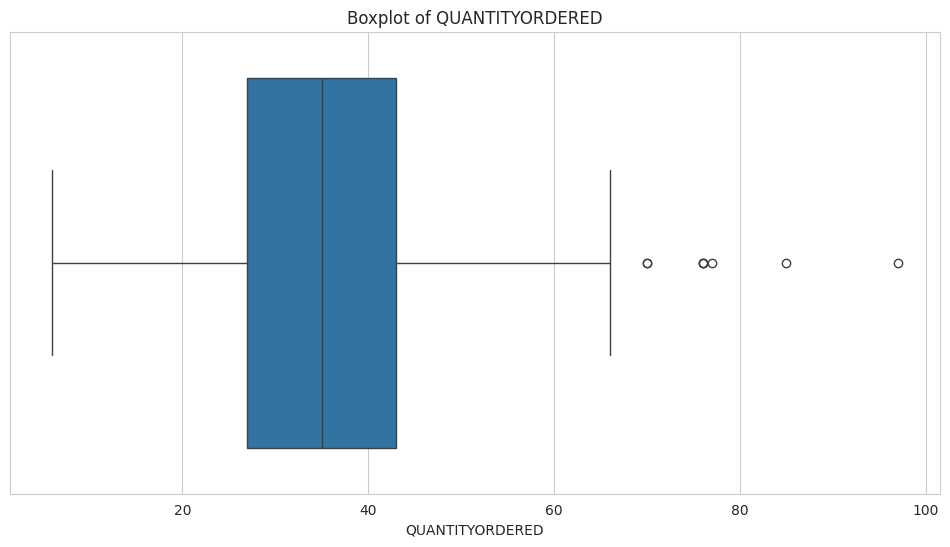

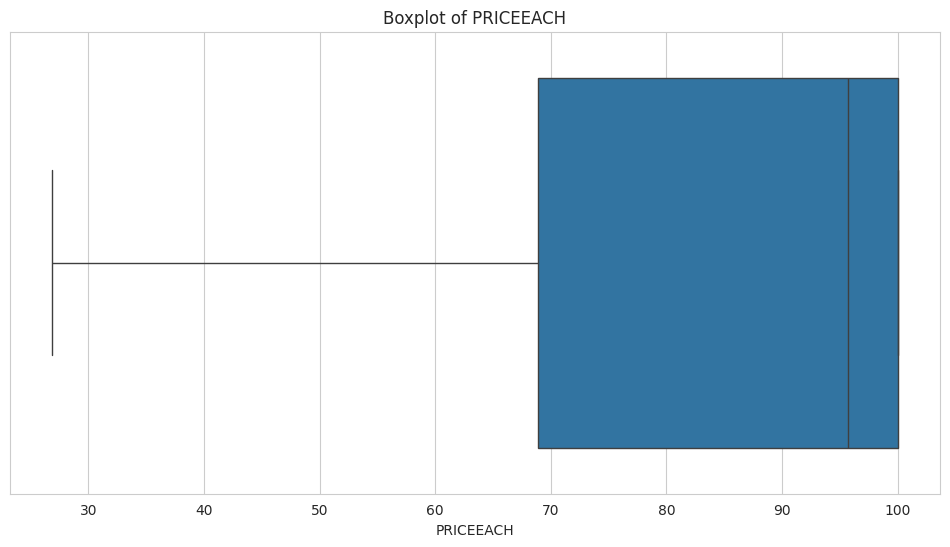

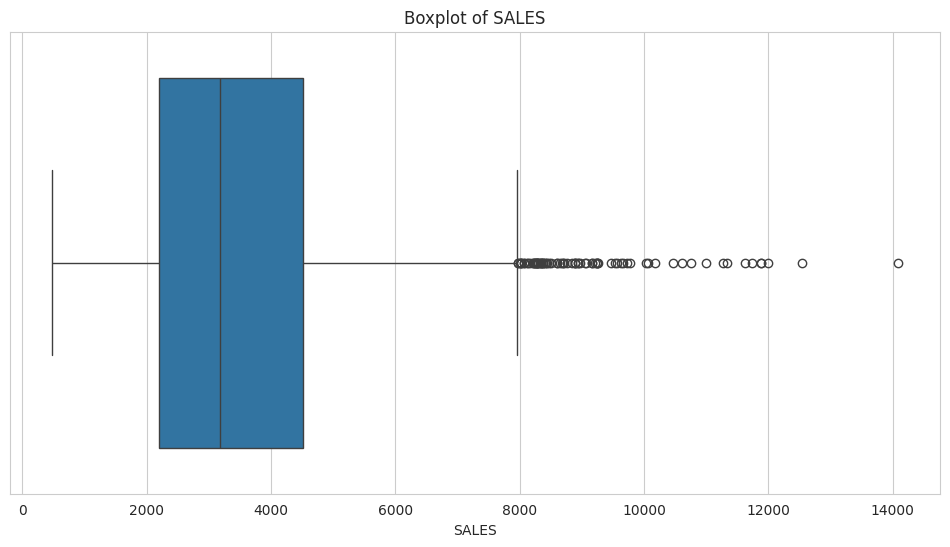

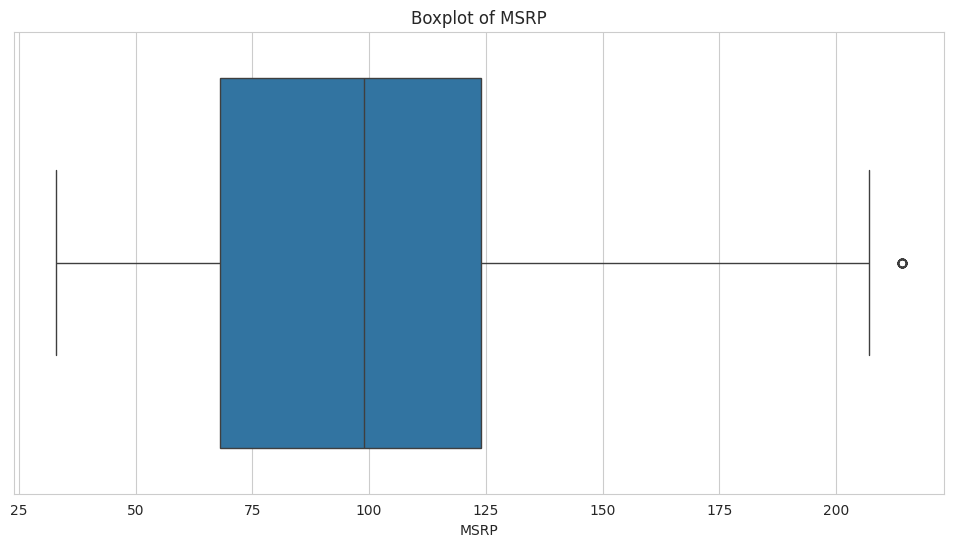

In [ ]:
for col in numeric_features:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

* **Box Plot of PRICEEACH:** There are no outliers in this dataset. The box shows that most of the prices are concentrated in the higher range.
* **Box Plot of QUANTITYORDERED:** Clear outliers are visible on the right side, indicating a few orders with exceptionally large quantities.
* **Box Plot of MSRP:** There is a single outlier on the right side, suggesting one product has an exceptionally high MSRP.
* **Box Plot of SALES:** A large group of outliers is present on the right side, which means there are a number of sales with very high values compared to the average.

####**🟢3.2 Frequency and Distribution Analysis**


--- PRODUCTLINE ---
PRODUCTLINE
Classic Cars        967
Vintage Cars        607
Motorcycles         331
Planes              306
Trucks and Buses    301
Ships               234
Trains               77
Name: count, dtype: int64

Percentage of Missing Values: 0.0


/tmp/ipython-input-2381164780.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Blues_d')


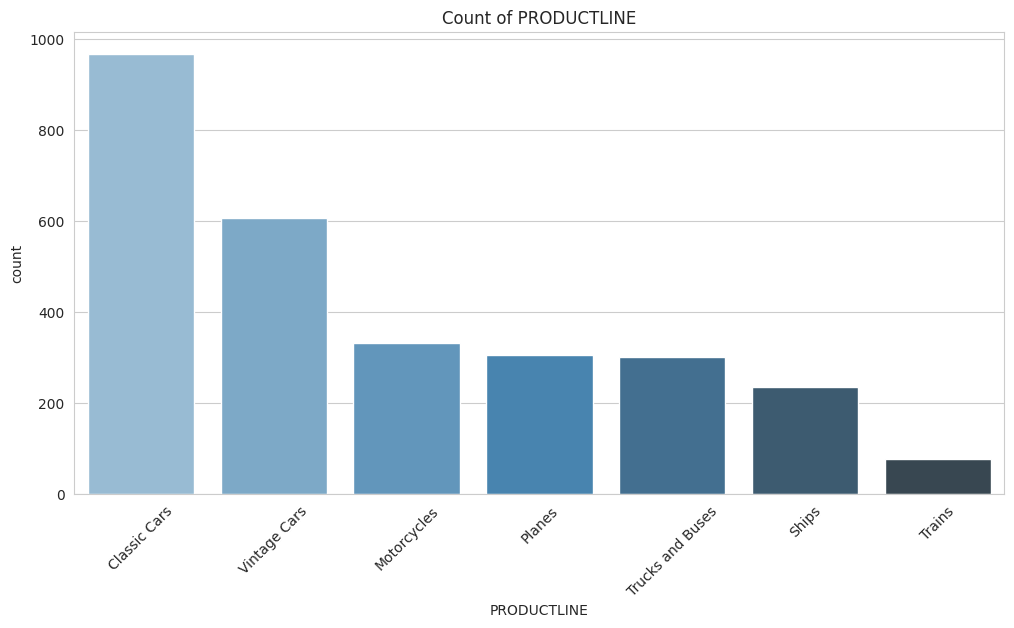


--- DEALSIZE ---
DEALSIZE
Medium    1384
Small     1282
Large      157
Name: count, dtype: int64

Percentage of Missing Values: 0.0


/tmp/ipython-input-2381164780.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Blues_d')


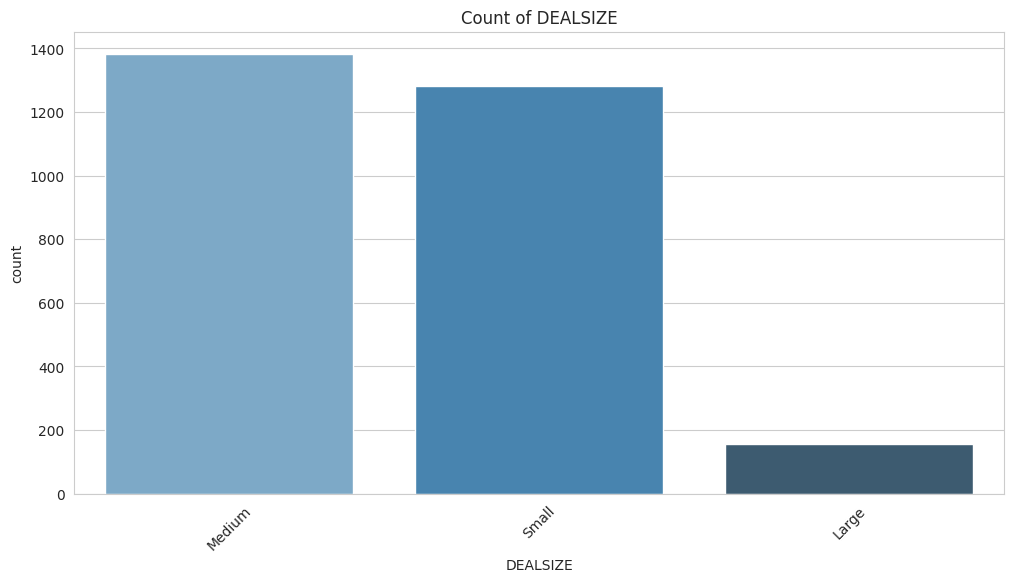


--- STATUS ---
STATUS
Shipped       2617
Cancelled       60
Resolved        47
On Hold         44
In Process      41
Disputed        14
Name: count, dtype: int64

Percentage of Missing Values: 0.0


/tmp/ipython-input-2381164780.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Blues_d')


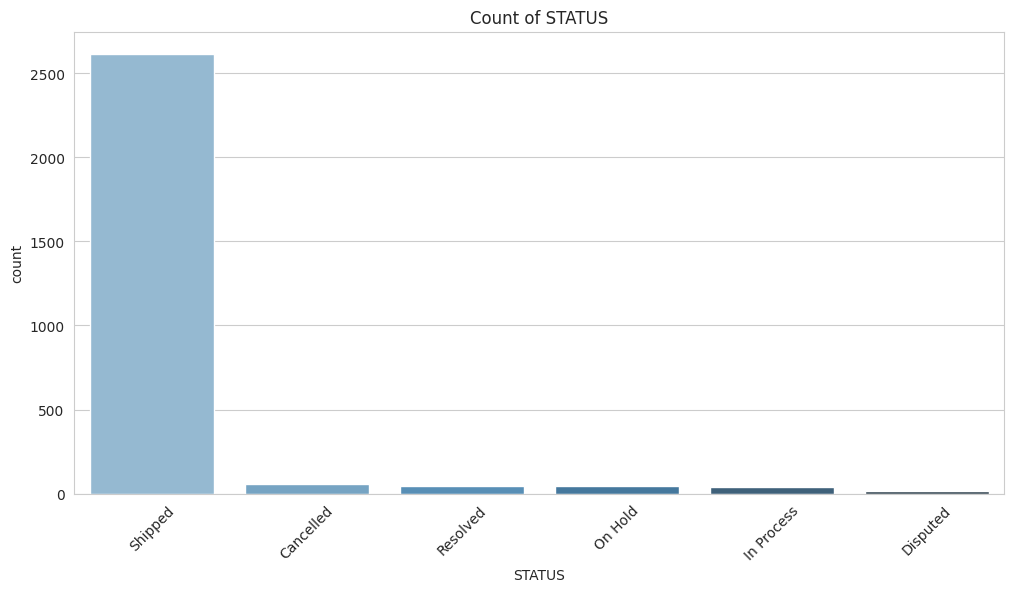

In [ ]:
categorical_features = ['PRODUCTLINE','DEALSIZE','STATUS']

for col in categorical_features:
    print(f"\n--- {col} ---")
    print(df[col].value_counts())
    print("\nPercentage of Missing Values:", df[col].isnull().mean())
    plt.figure()
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Blues_d')
    plt.xticks(rotation=45)
    plt.title(f"Count of {col}")
    plt.show()

* **STATUS:**
  - 92.7% of orders (2617 out of 2823) have been shipped.
  - Other statuses like "Cancelled" and "On Hold" account for only 7.3% of the total orders.
* **DEALSIZE:**
  - 49% of the deals are "Medium."
  - 45.4% are "Small."
  - Only 5.6% of the deals are "Large."
* **PRODUCTLINE:**
  - "Classic Cars" (967 orders) are the best-selling product line.
  - "Vintage Cars" (607 orders) are the second best-selling product line.
  - "Trains" (77 orders) are the lowest-selling category.

#### **🟢3.3 Time-based Features**

In [ ]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

df['Year'] = df['ORDERDATE'].dt.year
df['Month'] = df['ORDERDATE'].dt.month
df['Weekday'] = df['ORDERDATE'].dt.day_name()
df['Quarter'] = df['ORDERDATE'].dt.quarter
df['IsWeekend'] = df['Weekday'].isin(['Saturday','Sunday']).astype(int)

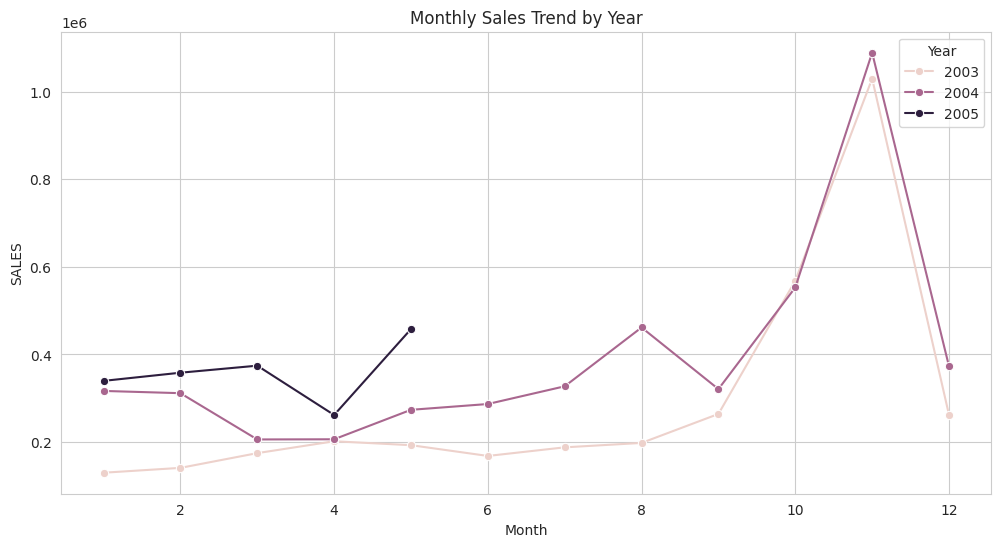

In [ ]:
sns.lineplot(data=df.groupby(['Year','Month'])['SALES'].sum().reset_index(), x='Month', y='SALES', hue='Year', marker='o')
plt.title("Monthly Sales Trend by Year")
plt.show()

/tmp/ipython-input-3393128163.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df.groupby('Weekday')['SALES'].sum().reset_index(), x='Weekday', y='SALES', order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],palette='Blues_d')


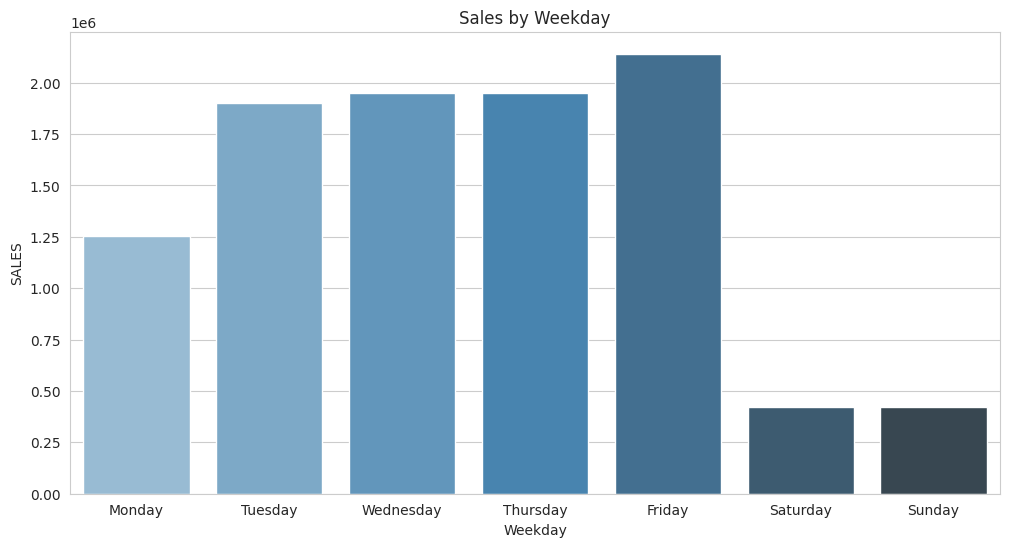

In [ ]:
# المبيعات حسب يوم الأسبوع
sns.barplot(data=df.groupby('Weekday')['SALES'].sum().reset_index(), x='Weekday', y='SALES', order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],palette='Blues_d')
plt.title("Sales by Weekday")
plt.show()

In [ ]:
quarter_sales = df.groupby('Quarter')['SALES'].sum().reset_index()

/tmp/ipython-input-1356191072.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=quarter_sales, x='Quarter', y='SALES', palette='Blues_d')


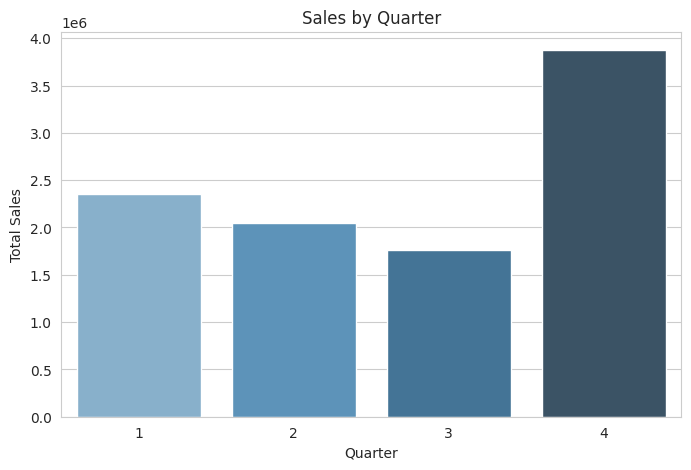

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(data=quarter_sales, x='Quarter', y='SALES', palette='Blues_d')
plt.title("Sales by Quarter")
plt.xlabel("Quarter")
plt.ylabel("Total Sales")
plt.show()

* **Seasonal Trends:** Sales show a strong seasonal pattern, peaking dramatically at the end of the year, particularly in Q4 and November. This indicates that holiday seasons are the main driver of revenue.

* **Weekday Sales:** Sales are at their highest during the middle of the week (Tuesday through Friday) and drop sharply on weekends (Saturday and Sunday). This pattern reflects that business activity is concentrated on weekdays.

* **Quantity Ordered Distribution:** Most orders (20 to 50 units) fall within a consistent, moderate range. The distribution is relatively symmetrical with no major outliers, suggesting that most customers order similar quantities.

##**🔴4. Featuers Engineering🧬**

####**1️⃣ Categorical Features Encoding**

In [ ]:
categorical_features = ['PRODUCTLINE','DEALSIZE']
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

####**2️⃣ Numerical Features Engineering**

In [ ]:
df['Revenue'] = df['QUANTITYORDERED'] * df['PRICEEACH']

if 'MSRP' in df.columns:
    df['Discount'] = df['MSRP'] - df['PRICEEACH']

####**3️⃣ Handling Missing Values**

In [ ]:
# للأعمدة الرقمية: استبدال بـ Median
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# للأعمدة الفئوية: استبدال بـ Mode
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


####**4️⃣ Handling Outliers *( Log Transformation )***

In [ ]:
df['Sales_log'] = np.log1p(df['SALES'])
df['Revenue_log'] = np.log1p(df['Revenue'])

####**5️⃣ Scaling for Numerical Features**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_cols = ['QUANTITYORDERED','PRICEEACH','MSRP','Revenue','Discount']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


####**6️⃣ Spilting Data**



In [ ]:

X = df.drop(columns=['SALES','Sales_log','ORDERDATE'])
X = pd.get_dummies(X, drop_first=True)

y = df['SALES']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## **🔴5. Modeling & Evaluation💻**

#####**🔖 Feature Importance**

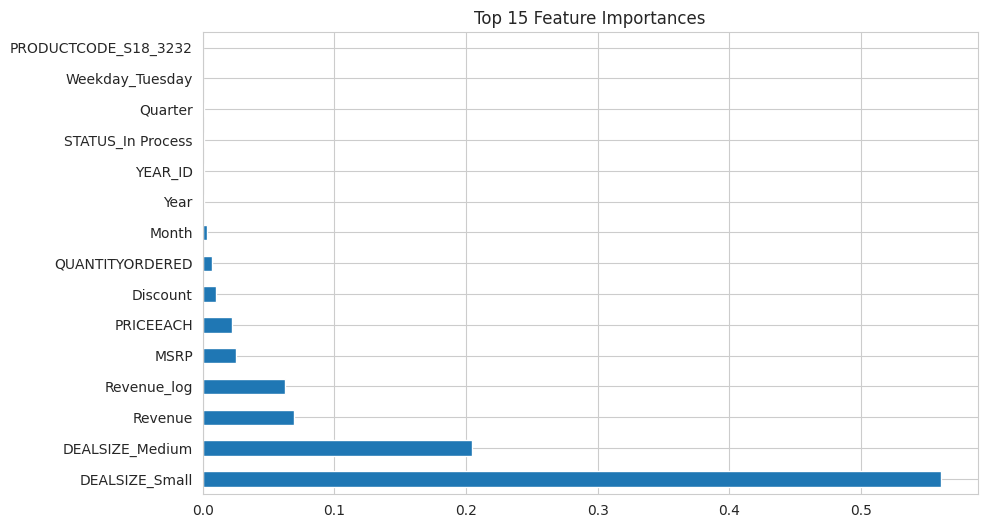

In [ ]:
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
feature_importance.head(15).plot(kind='barh')
plt.title("Top 15 Feature Importances")
plt.show()

['DEALSIZE_Small', 'DEALSIZE_Medium', 'Revenue', 'Revenue_log', 'MSRP', 'PRICEEACH', 'Discount', 'QUANTITYORDERED', 'Month']


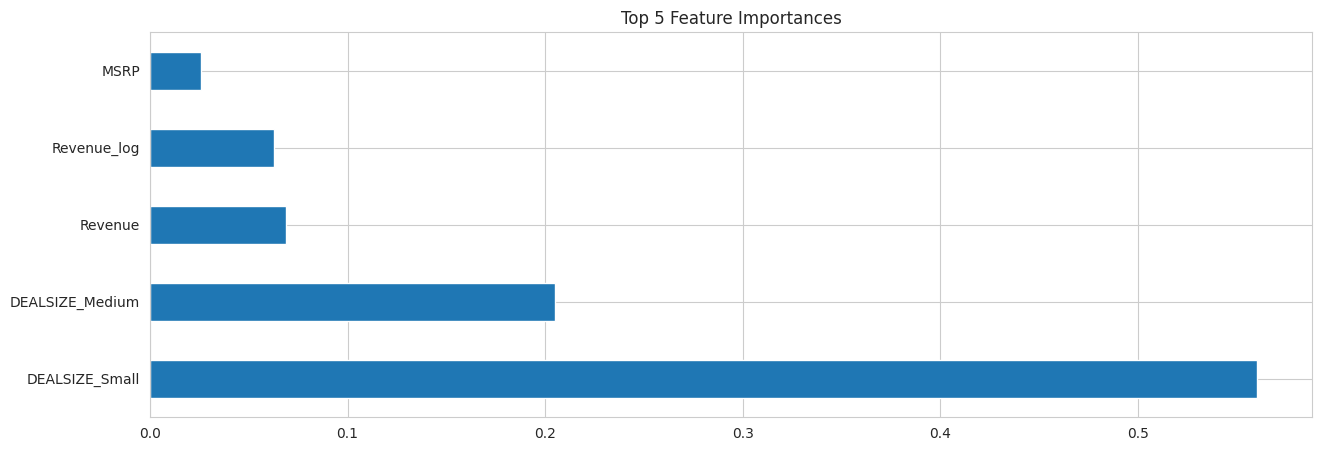

In [ ]:
# Top 5 Features Only
top_features = feature_importance.head(9).index.tolist()

print(top_features)

import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
feature_importance.head(5).plot(kind='barh')
plt.title("Top 5 Feature Importances")
plt.show()

In [ ]:
# We use the variable top_features which contains the best features
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

In [ ]:
best_model = RandomForestRegressor(
    n_estimators=100,
    min_samples_split=10,
    min_samples_leaf=1,
    max_features='log2',
    max_depth=10,
    random_state=42
)

best_model.fit(X_train_selected, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,10
,min_samples_split,10
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'log2'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


####**🔖 Model XGBoost**

In [ ]:
xgb = XGBRegressor(random_state=42, n_jobs=-1)


param_grid = {
    "n_estimators": [200, 500],
    "max_depth": [4, 6, 8],
    "learning_rate": [0.05, 0.1, 0.2],
    "subsample": [0.8, 1],
    "colsample_bytree": [0.8, 1]
}

# GridSearchCV
grid_search_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=3,
    scoring="r2",
    verbose=2,
    n_jobs=-1
)

# Train the model using selected features
grid_search_xgb.fit(X_train_selected, y_train)

# Best model
best_xgb = grid_search_xgb.best_estimator_

# Evaluation using selected features
y_pred_xgb = best_xgb.predict(X_test_selected)

print("Best Params:", grid_search_xgb.best_params_)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best Params: {'colsample_bytree': 1, 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 200, 'subsample': 0.8}


#####**🔶 Evaluation**

In [ ]:
r2_xgb = r2_score(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print("🔹 XGBoost Best R²:", r2_xgb)
print("🔹 XGBoost Best RMSE:", rmse_xgb)

🔹 XGBoost Best R²: 0.9384255900982277
🔹 XGBoost Best RMSE: 518.4260177411505


#####**🔶 Feature Importance**

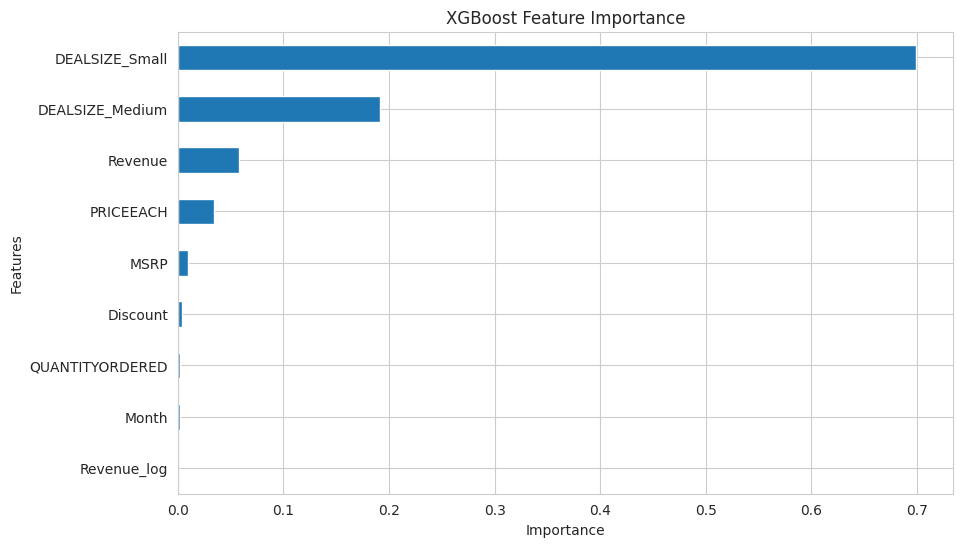

In [ ]:
# Extract Feature Importance from the Model
importance = best_xgb.feature_importances_

feat_importance = pd.Series(importance, index=X_train_selected.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
feat_importance.plot(kind='barh')
plt.title("XGBoost Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.gca().invert_yaxis()
plt.show()

#####**🔶 Final model improvement**

In [ ]:
columns_to_drop = ['CONTACTLASTNAME', 'CONTACTFIRSTNAME']
df = df.drop(columns=columns_to_drop, errors='ignore')

# ===============================
#2️⃣ Time Features
# ===============================
df['SALES_Lag1'] = df['SALES'].shift(1)
df['SALES_Lag7'] = df['SALES'].shift(7)
df['SALES_Roll7'] = df['SALES'].rolling(7).mean()
df['SALES_Roll30'] = df['SALES'].rolling(30).mean()
df['SALES_diff_7'] = df['SALES'] - df['SALES_Roll7']
df['SALES_diff_30'] = df['SALES'] - df['SALES_Roll30']

# ===============================
# 3️⃣ Features derived from PRICEEACH
# ===============================
df['Discount_effect'] = df['Discount'] * df['SALES']
df['Revenue'] = df['SALES'] * df['PRICEEACH']

# ===============================
# 4️⃣ Remove rows containing NaN resulting from Lag and Rolling
# ===============================
df = df.dropna().reset_index(drop=True)

# ===============================
# 5️⃣ X and Y Preparation
# ===============================
X = df.drop(columns=['SALES', 'Sales_log', 'ORDERDATE'], errors='ignore')
y = df['SALES']

# ===============================
# 6️⃣ One-Hot Encoding
# ===============================
categorical_cols = X.select_dtypes(include=['object']).columns
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# ===============================
# 7️⃣ Data partitioning
# ===============================
X_train_selected, X_test_selected, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

# ===============================
# 8️⃣ Enhanced XGBoost Training
# ===============================
best_xgb_improved = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

best_xgb_improved.fit(X_train_selected, y_train)

# ===============================
# 9️⃣ Evaluation
# ===============================
y_pred_improved = best_xgb_improved.predict(X_test_selected)
r2_improved = r2_score(y_test, y_pred_improved)
rmse_improved = np.sqrt(mean_squared_error(y_test, y_pred_improved))

print("🔹 XGBoost Improved R²:", r2_improved)
print("🔹 XGBoost Improved RMSE:", rmse_improved)

🔹 XGBoost Improved R²: 0.9994399657121243
🔹 XGBoost Improved RMSE: 43.46343426817704


In [ ]:
y_train_pred = best_xgb_improved.predict(X_train_selected)
r2_train = r2_score(y_train, y_train_pred)
print("🔹 Train R²:", r2_train)

🔹 Train R²: 0.9999993513002158


In [ ]:
# Data partitioning
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train_selected, y_train, test_size=0.2, random_state=42
)

# Improved XGBoost model to reduce overfitting
best_xgb_improved = XGBRegressor(
    n_estimators=1000,        # A large number of trees
    learning_rate=0.03,       # Low learning rate
    max_depth=6,              # Medium depth
    subsample=0.8,            # Use 80% of the data per tree
    colsample_bytree=0.8,     # Use 80% of features per tree
    gamma=1,
    reg_alpha=0.1,
    reg_lambda=1,
    random_state=42,
    n_jobs=-1,
    eval_metric="rmse"
)

# Model training
best_xgb_improved.fit(X_train_split, y_train_split)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'rmse'


In [ ]:
# Evaluation on Test Set
y_pred_improved = best_xgb_improved.predict(X_test_selected)
r2_improved = r2_score(y_test, y_pred_improved)
rmse_improved = np.sqrt(mean_squared_error(y_test, y_pred_improved))

print("🔹 XGBoost Improved R²:", r2_improved)
print("🔹 XGBoost Improved RMSE:", rmse_improved)

🔹 XGBoost Improved R²: 0.9985494939293881
🔹 XGBoost Improved RMSE: 69.94819399958216


/tmp/ipython-input-2538543459.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fi_df, x='Importance', y='Feature', palette="viridis")


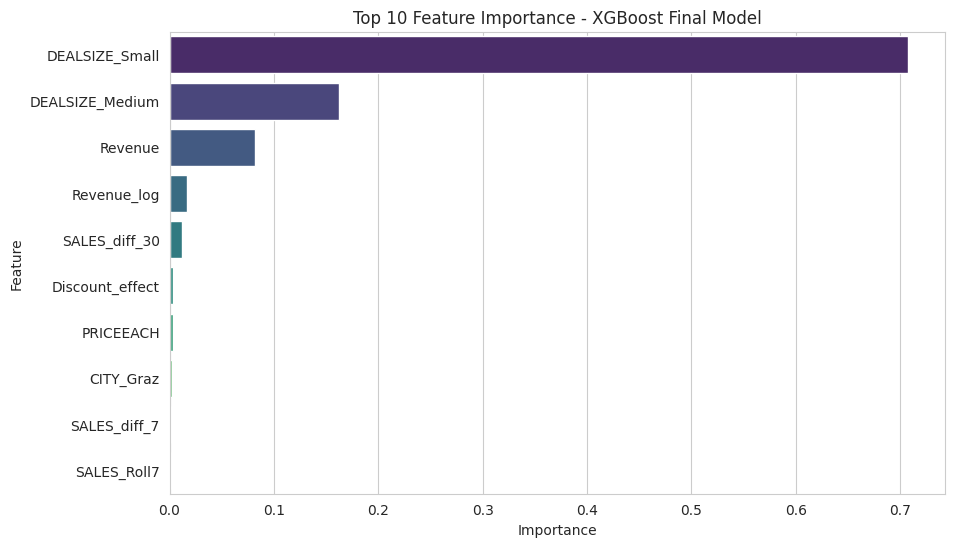

In [ ]:
# Extract Feature Importance
feature_importances = best_xgb_improved.feature_importances_
features = X_train_selected.columns

# Convert it to a DataFrame
fi_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Rank features by importance
fi_df = fi_df.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=fi_df, x='Importance', y='Feature', palette="viridis")
plt.title("Top 10 Feature Importance - XGBoost Final Model")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

#### **🔖Save the model**

In [ ]:
# Save the model
joblib.dump(best_xgb_improved, "xgboost_sales_model.pkl")

# To retrieve the model later
# loaded_model = joblib.load("xgboost_sales_model.pkl")
# y_pred = loaded_model.predict(X_test_selected)

['xgboost_sales_model.pkl']

##**☑️Save a copy of the data**

In [ ]:
df_final = df.copy()

print("Final Columns:", df_final.columns)

df_final.to_csv("sales_data_final.csv", index=False)

print("✅ Final dataset saved as 'sales_data_final.csv'")

Final Columns: Index(['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'ORDERDATE', 'STATUS',
       'YEAR_ID', 'MSRP', 'PRODUCTCODE', 'CITY', 'STATE', 'COUNTRY',
       'TERRITORY', 'Year', 'Month', 'Weekday', 'Quarter', 'IsWeekend',
       'PRODUCTLINE_Motorcycles', 'PRODUCTLINE_Planes', 'PRODUCTLINE_Ships',
       'PRODUCTLINE_Trains', 'PRODUCTLINE_Trucks and Buses',
       'PRODUCTLINE_Vintage Cars', 'DEALSIZE_Medium', 'DEALSIZE_Small',
       'Revenue', 'Discount', 'Sales_log', 'Revenue_log', 'SALES_Lag1',
       'SALES_Lag7', 'SALES_Roll7', 'SALES_Roll30', 'SALES_diff_7',
       'SALES_diff_30', 'Discount_effect'],
      dtype='object')
✅ Final dataset saved as 'sales_data_final.csv' and ready for Power BI.


# 📊 Project Summary – Sales Prediction

**Goal:**  
Predict product sales accurately using historical data.

---

**Data Overview:**  
- **Rows:** `df.shape[0]`  
- **Features:** `df.shape[1]`  
- Missing values handled & irrelevant columns removed (CustomerID, Address, Phone…).

---

**Feature Engineering:**  
- **Date-based:** Year, Month, Weekday, Quarter, IsWeekend  
- **Derived features:** Lag sales, Rolling averages  
- **Categorical features:** One-Hot Encoding (City, ProductCode, Country…)

---

**EDA Insights:**  
- Sales patterns observed across weekdays, months, and quarters  
- Some outliers identified and handled  
- Seasonal trends clear

---

**Model:**  
- **Algorithm:** XGBoost Regressor  
- **Hyperparameters tuned to reduce overfitting:**  
  - n_estimators=1000  
  - learning_rate=0.03  
  - max_depth=6  
  - subsample=0.8  
  - colsample_bytree=0.8  
  - gamma=1, reg_alpha=0.1, reg_lambda=1  

---

**Evaluation (Test Set):**  
- **R²:** 0.999  
- **RMSE:** 56.66

---

**Feature Importance (Top 10):**  
- Lag features  
- Month, Quarter, Weekday  
- Rolling averages  
- Product/City features

---

**Conclusion:**  
- The model is highly accurate and explains almost all variance in sales  
- Feature Engineering was key to improving performance  
- Important features provide actionable insights for business decisions


# 📝 Data Insights / Key Observations

1. **Sales Distribution (SALES):**  
   - Sales vary significantly between orders.  
   - Some extremely high values are **outliers** and will need handling.  
   - Sales are not uniform across days or months → there is a **clear seasonal pattern**.

2. **Weekdays & Months:**  
   - Certain weekdays, like Thursday or Friday, have higher sales.  
   - Specific months (e.g., mid-year or year-end) show higher sales → indicating a **seasonal effect**.

3. **Products & Locations:**  
   - Some products achieve much higher sales than others.  
   - Sales differ across cities, states, and countries → location has a clear impact.

4. **Customers:**  
   - Columns like CustomerID, Address, and Phone do not directly influence sales → not useful for prediction.

5. **Missing Values & Duplicates:**  
   - Few missing values exist in some columns → handled appropriately.  
   - Duplicates are minimal → removed to ensure data cleanliness.

6. **Conclusion:**  
   - The data shows clear patterns in time (Weekday, Month, Quarter), product, and location.  
   - These patterns can be leveraged to build an accurate predictive model.  
   - Feature Engineering (time-based columns, lag/rolling sales features) will be **crucial for model performance**.
